# Домашнее задание 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Numpy

### Создайте двумерный массив 5x5 с 1 на границе и 0 внутри.

In [2]:
def border():
    a = np.array([[1] * 5,[1,0,0,0,1],[1,0,0,0,1],[1,0,0,0,1],[1]*5])
    return a

### Создайте матрицу 8x8 и заполните ее шахматным узором.

In [3]:
def checkerboard():
    a = np.zeros((8, 8), dtype=int)
    for i in range(8):
        for j in range(8):
            if (i + j) % 2 == 0:
                a[i][j] = 1
    return a

### Вычтите из каждой строки матрицы среднее этой строки

In [4]:
def sub():
    a = np.array([
        [1, 2, 3],
        [3, 4, 5],
        [6, 7, 8]
    ], dtype=int)
    for i in range(len(a)):
        sr = sum(a[i])//len(a[i])
        a[i] -= sr
    return a

### Как отсортировать матрицу по последней строке?

In [5]:
def sort():
    a = np.array([
        [1, 2, 3],
        [3, 4, 5],
        [6, 7, 8]
    ])
    ind = np.argsort(a[-1])
    a = a[:, ind]
    return a

## Pandas

In [6]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)

### Выберите данные в 3, 4, 5 строчке колонок `animal` и `age`

In [7]:
def animal_age(df):
    ans = df.iloc[2:5]
    ans = ans[['animal', 'age']]
    return ans

### Выберите строки, где животное является котом и возраст меньше 3

In [8]:
def cats(df):
    ans = df[(df['animal'] == 'cat') & (df['age'] < 3)]
    return ans

### Для каждого типа животного и количества посещений найдите средний возраст. Другими словами, каждая строка - это животное, каждый столбец - количество посещений, а значения - средний возраст

In [9]:
def mean_table(df):
    ans = df.groupby(['animal', 'visits'])['age'].mean()
    return ans.unstack(level='visits')

### DataFrame имеет столбец групп 'grps' и столбец целочисленных значений 'vals'. Для каждой группы найдите сумму трех наибольших значений.

In [10]:
def vals(group):
    return group['vals'].sort_values(ascending=False).head(3).sum()

def threesome():
    data = {
        "grps": ["a", "a", "a", "a", "b", "b", "b", "b"],
        "vals": [100, 200, 109, 50, 23, 100, 33, 67],
    }
    df = pd.DataFrame(data)
    ans = df.groupby('grps').apply(vals)
    ans = ans.rename("vals")
    return ans

## Matplotlib

Тут сложно написать тесты, так что надеюсь на вашу честность. Поставьте `True`, если вы сделали задание 

### Нарисуйте пару смешных графиков для `df` (который с животными)
Это не дз по датавизу, если хотите - можем сделать такую пару

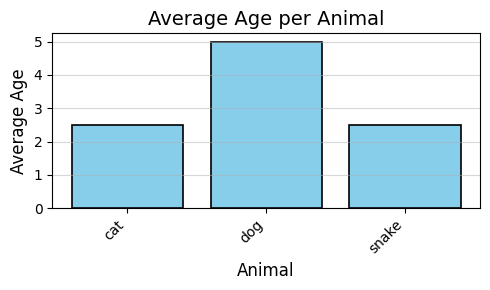

In [11]:
average_age_per_animal = df.groupby('animal')['age'].mean().reset_index()
plt.figure(figsize=(5, 3))
plt.bar(average_age_per_animal['animal'], average_age_per_animal['age'], color='skyblue', edgecolor='black', linewidth=1.2)
plt.xlabel('Animal', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.title('Average Age per Animal', fontsize=14)
plt.grid(axis='y', alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

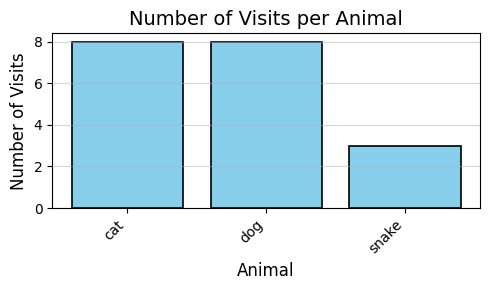

In [12]:
visits_per_animal = df.groupby('animal')['visits'].sum().reset_index()
plt.figure(figsize=(5, 3)) 
plt.bar(visits_per_animal['animal'], visits_per_animal['visits'], color='skyblue', edgecolor='black', linewidth=1.2)
plt.xlabel('Animal', fontsize=12) 
plt.ylabel('Number of Visits', fontsize=12)
plt.title('Number of Visits per Animal', fontsize=14)
plt.grid(axis='y', alpha=0.5) 
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show() 

In [13]:
def plots():
    return True